# **AI Assistant for Visually Impaired People**

# **1. Objects Detection Feature**

In [1]:
# Install the requirements
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer

In [15]:
pip install py-espeak-ng

In [2]:
from PIL import Image
from transformers import pipeline

In [3]:
from transformers.utils import logging
logging.set_verbosity_error()

## Import the detr-resnet-50 model from Meta(Facebook) for object detection

In [5]:
# prompt: install timm

!pip install timm


In [6]:
od_pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

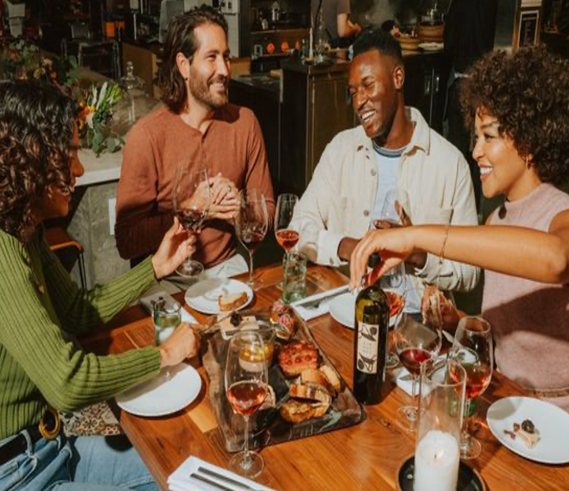

In [7]:
raw_image = Image.open('./image_restaurant.PNG')
raw_image.resize((569, 491))

In [8]:
pipeline_output = od_pipe(raw_image)

In [9]:
pipeline_output

[{'score': 0.9244400858879089,
  'label': 'chair',
  'box': {'xmin': 104, 'ymin': 376, 'xmax': 182, 'ymax': 466}},
 {'score': 0.6468360424041748,
  'label': 'bottle',
  'box': {'xmin': 631, 'ymin': 51, 'xmax': 651, 'ymax': 104}},
 {'score': 0.6023364067077637,
  'label': 'bottle',
  'box': {'xmin': 659, 'ymin': 10, 'xmax': 687, 'ymax': 98}},
 {'score': 0.5794901847839355,
  'label': 'oven',
  'box': {'xmin': 486, 'ymin': 112, 'xmax': 632, 'ymax': 322}},
 {'score': 0.9672974944114685,
  'label': 'cup',
  'box': {'xmin': 599, 'ymin': 409, 'xmax': 651, 'ymax': 494}},
 {'score': 0.5877159833908081,
  'label': 'chair',
  'box': {'xmin': 87, 'ymin': 375, 'xmax': 195, 'ymax': 531}},
 {'score': 0.9767816662788391,
  'label': 'person',
  'box': {'xmin': 739, 'ymin': 70, 'xmax': 1204, 'ymax': 554}},
 {'score': 0.8698321580886841,
  'label': 'potted plant',
  'box': {'xmin': 153, 'ymin': 128, 'xmax': 276, 'ymax': 253}},
 {'score': 0.9765176773071289,
  'label': 'cup',
  'box': {'xmin': 873, 'ymin

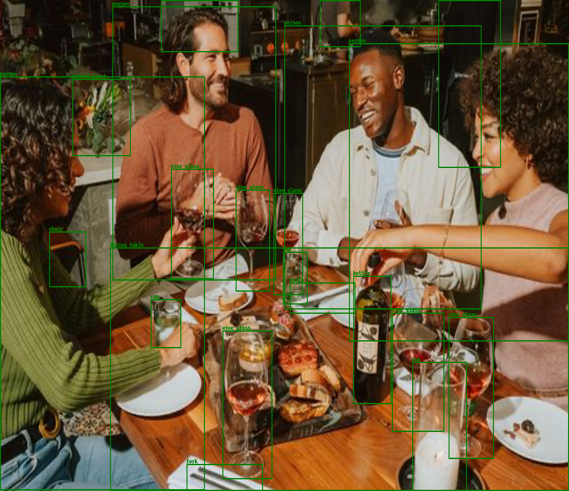

In [10]:
from PIL import Image, ImageDraw, ImageFont

# Load the image
image = Image.open('image_restaurant.PNG')

# Iterate over the detections
for detection in pipeline_output:
    # Extract the bounding box coordinates
    if detection['score']>0.8:
        xmin, ymin, xmax, ymax = detection['box']['xmin'], detection['box']['ymin'], detection['box']['xmax'], detection['box']['ymax']

        # Draw the bounding box
        draw = ImageDraw.Draw(image)
        draw.rectangle((xmin, ymin, xmax, ymax), outline='green', width=2)

        # Draw the label
        draw.text((xmin, ymin - 10), detection['label'], fill='green')

    else:
        pass

# Save the output image
image.resize((569, 491))

In [11]:
import os
import gradio as gr

In [12]:
def render_image_results(pil_image, pipeline_output):
    image = Image.open('image_restaurant.PNG')
    # Iterate over the detections
    for detection in pipeline_output:
        if detection['score']>0.8:
            # Extract the bounding box coordinates
            xmin, ymin, xmax, ymax = detection['box']['xmin'], detection['box']['ymin'], detection['box']['xmax'], detection['box']['ymax']

            # Draw the bounding box
            draw = ImageDraw.Draw(image)
            draw.rectangle((xmin, ymin, xmax, ymax), outline='green', width=2)

            # Draw the label
            draw.text((xmin, ymin - 10), detection['label'], fill='green')

    # Save the output image
    return image.resize((569, 491))

In [13]:
def get_pipeline_prediction(pil_image):

    pipeline_output = od_pipe(pil_image)

    processed_image = render_image_results(pil_image, pipeline_output)
    return processed_image

In [14]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image",
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

In [15]:
demo.launch(debug=True);

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://6b1c4bb75ce819a49e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 532, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1928, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1514, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    r

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6b1c4bb75ce819a49e.gradio.live


In [ ]:
demo.close()

Closing server running on port: 7860


# **2. Describe(Summarize) Objects Detected**

In [16]:
summarizer1 = pipeline("summarization", model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [17]:
summarizer2 = pipeline("summarization", model="Falconsai/text_summarization")

config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [18]:
summarizer3 = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [19]:
labels = [d['label'] for d in pipeline_output]

In [20]:
labels

['chair',
 'bottle',
 'bottle',
 'oven',
 'cup',
 'chair',
 'person',
 'potted plant',
 'cup',
 'wine glass',
 'chair',
 'person',
 'wine glass',
 'chair',
 'person',
 'wine glass',
 'refrigerator',
 'dining table',
 'fork',
 'cup',
 'wine glass',
 'dining table',
 'refrigerator',
 'person',
 'chair',
 'person',
 'person',
 'dining table',
 'dining table',
 'wine glass',
 'wine glass',
 'bottle',
 'knife',
 'person',
 'person']

In [21]:
labels.insert(0, "I can see the following objects list: ")

In [22]:
joined_list = ', '.join(labels)

In [23]:
joined_list

'I can see the following objects list: , chair, bottle, bottle, oven, cup, chair, person, potted plant, cup, wine glass, chair, person, wine glass, chair, person, wine glass, refrigerator, dining table, fork, cup, wine glass, dining table, refrigerator, person, chair, person, person, dining table, dining table, wine glass, wine glass, bottle, knife, person, person'

In [24]:
text1 = summarizer1(joined_list)

In [25]:
text1

[{'summary_text': 'I can see the following objects list: , chair, bottle, bottle,. oven, cup, chair, person, potted plant,. cup, wine glass, chair. I can see a bottle, knife, person,. person, person and a wine glass. I have also seen a chair, a knife, a fork, a bottle and a plate.'}]

In [26]:
text2 = summarizer2(joined_list)

In [27]:
text2

[{'summary_text': 'table, table, fork, cup, wine glass, dining table, refrigerator, person, chair, person . table, glass, bottle, oven, cup . cup, chair . potted plant, cup. wine glass.'}]

In [28]:
text3 = summarizer3(joined_list)

In [29]:
text3

[{'summary_text': ' I can see the following objects list: , chair, bottle, bottle,. bottle, oven, chair, person, potted plant, cup, wine glass, fork, fork . I can also see the list of objects in a cup, a bottle, a knife, a table, a chair, a fork, a spoon, a plate, a glass of wine .'}]

# **3. Narrate of the Description**

In [30]:
tts_pipe = pipeline("text-to-speech", model="kakao-enterprise/vits-ljs")

config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.14k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

In [32]:
# prompt: install espeak

!sudo apt-get install espeak


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,382 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak amd64 1.48.15+dfsg-3 [64.2 kB]
Fetched 1,382 kB in 0s (3,397 

In [33]:
narrated_text = tts_pipe(text3[0]['summary_text'])

In [34]:
from IPython.display import Audio as IPythonAudio

In [35]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

## **4. Question and Answer Feature**

In [3]:
from transformers import BlipForQuestionAnswering
from transformers import AutoProcessor, AutoModelForVisualQuestionAnswering

In [4]:
processor = AutoProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = AutoModelForVisualQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

In [ ]:
from PIL import Image

In [5]:
image = Image.open("./girl_dog.PNG")

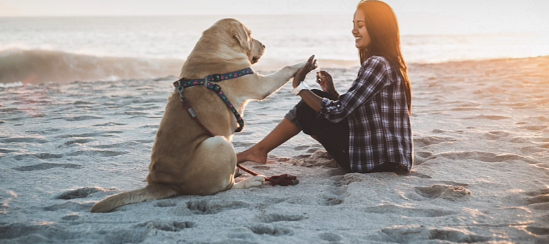

In [6]:
image

In [7]:
question = "how many dogs are in the picture?"

In [8]:
inputs = processor(image, question, return_tensors="pt")

In [9]:
out = model.generate(**inputs)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [10]:
print(processor.decode(out[0], skip_special_tokens=True))

1
